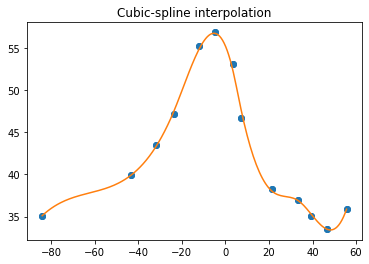

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import splev, splrep
from scipy import interpolate
%matplotlib inline

df =  pd.read_csv('data/merged_pcv.csv',names = ['t','mtd','id'])
uniques =df.id.unique()
patient = df[df.id == uniques[0]]


x = list(patient.t)
y = list(patient.mtd)

spl = interpolate.splrep(x, y, s=2)
x2 = np.linspace(x[0],x[-1], 200)
y2 = splev(x2, spl)


plt.figure()
plt.plot(x, y, 'o', x2, y2)
# plt.axis([-0.05, 6.33, -1.05, 1.05])
plt.title('Cubic-spline interpolation')

plt.scatter(list(patient.t),list(patient.mtd))


plt.show()

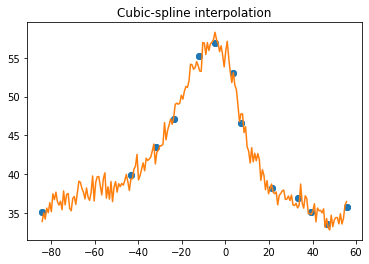

In [2]:
mu, sigma = 0, 1 # mean and standard deviation
s = np.random.normal(mu, sigma, len(x2))
y2 = y2 +s

plt.figure()
plt.plot(x, y, 'o', x2, y2)
# plt.axis([-0.05, 6.33, -1.05, 1.05])
plt.title('Cubic-spline interpolation')

plt.scatter(list(patient.t),list(patient.mtd))
plt.show()


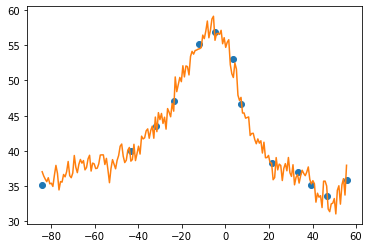

In [3]:
def generator(x,y):
    spl = interpolate.splrep(x, y, s=2)
    x2 = np.linspace(x[0],x[-1], 200)
    y2 = splev(x2, spl)
    mu, sigma = 0, 1 # mean and standard deviation
    s = np.random.normal(mu, sigma, len(x2))
    y2 = y2 +s
    return [x2,y2]

df =  pd.read_csv('data/merged_pcv.csv',names = ['t','mtd','id'])
uniques =df.id.unique()
patient = df[df.id == uniques[0]]

x = list(patient.t)
y = list(patient.mtd)
[x2,y2] = generator(x,y)

plt.plot(x, y, 'o', x2, y2)
plt.show()

In [4]:
# generate a tone of data 
import csv
NUM_RANDOM = 5

i=0
with open("out.csv","w+") as csvfile:
    writer = csv.writer(csvfile, delimiter=',')
    for patient_id in uniques:
        for j in range(NUM_RANDOM):
            [x,y] = generator(x,y)
            x=list(x)
            y=list(y)
#             print(y)
            for j in range(len(y)):
                writer.writerow((x[j],y[j],i,patient_id))
            i+=1

            
        
        


/home/x/anaconda3/envs/ml/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:512: RuntimeWarning: The maximal number of iterations (20) allowed for finding smoothing
spline with fp=s has been reached. Probable cause: s too small.
(abs(fp-s)/s>0.001)
  warnings.warn(RuntimeWarning(_iermess[ier][0]))


In [5]:
df =  pd.read_csv('out.csv',names = ['t','mtd','id','patient_id'])
df

,t,mtd,id,patient_id
0,-84.080717,35.068746,0,0
1,-83.378777,36.350058,0,0
2,-82.676837,36.211158,0,0
3,-81.974897,34.900870,0,0
4,-81.272957,35.344318,0,0
...,...,...,...,...
9995,52.797620,46.162323,49,206
9996,53.499561,38.718963,49,206
9997,54.201501,27.660163,49,206
9998,54.903441,21.875723,49,206


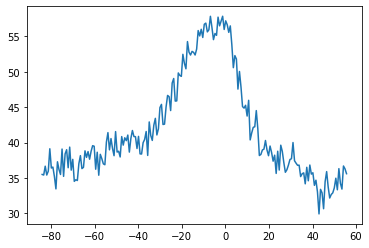

In [6]:
patient = df[df.id == 1]
patient1 = df[df.patient_id == 204]

plt.plot(patient.t, patient.mtd)
plt.show()

In [ ]:
# oversapling